# Jacobi RMA

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('all_data_grouped.csv')

## Plots

In [3]:
COLUMN_COLORS = ['#ff9999','#66b3ff','#99ff99']
COL_WIDTH_2 = 0.35
XLIMIT = (-0.5, 4.5)
PUT_POSITION = 0
GET_POSITION = 1
EDGE_COLOR = 'black'
X_LABEL_FONT_SIZE = 16
X_LABEL_PAD = 10
Y_LABEL_FONT_SIZE = 16
Y_LABEL_PAD = 10
TITLE_FONT_SIZE = 17
TICKS_FONT_SIZE = 14

def make_get_vs_put_plot(df, title="", ylog=False):
    put_df = df[df['operation'] == 'put']
    get_df = df[df['operation'] == 'get']
    
    pivot_put = put_df.pivot(index='nodes', columns='what', values='time')
    pivot_get = get_df.pivot(index='nodes', columns='what', values='time')
    
    # Make the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    pivot_get.plot(kind='bar', stacked=True, ax=ax, width=COL_WIDTH_2, position=GET_POSITION, edgecolor=EDGE_COLOR, color=COLUMN_COLORS)
    pivot_put.plot(kind='bar', stacked=True, ax=ax, width=COL_WIDTH_2, position=PUT_POSITION, edgecolor=EDGE_COLOR, color=COLUMN_COLORS)

    if ylog:
        plt.yscale('log')
    
    # Adjust x-axis ticks and labels
    ax.set_xticks(range(len(pivot_put.index)))
    ax.set_xticklabels(pivot_put.index, fontsize=TICKS_FONT_SIZE, fontweight='bold', rotation=0)

    # Adjust y-axis ticks and labels
    ax.tick_params(axis='y', which='major', labelsize=TICKS_FONT_SIZE)
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.xlim(XLIMIT)
    
    # Labels and title    
    plt.xlabel('Number of Nodes', fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD, fontweight='bold')
    ylab = 'log(Average time (s))' if ylog else 'Average time (s)'
    plt.ylabel(ylab, fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD, fontweight='bold')
    plt.title(title, fontsize=TITLE_FONT_SIZE, fontweight='bold')
    
    # Legend: 
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt

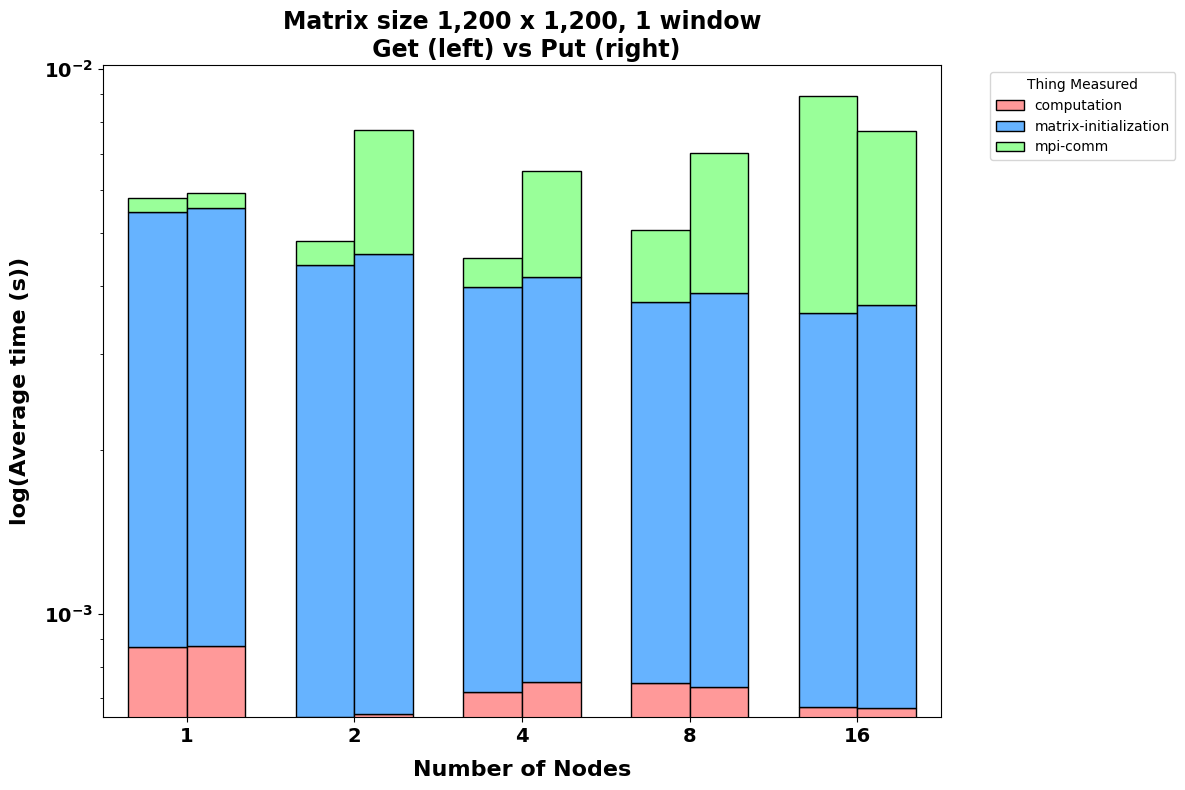

In [4]:
# fist plot: scalability: get vs put, 1 window
data_1win = data[data['windows'] == 1]
data_1win = data_1win[data_1win['operation'] != 'none']
data_1win = data_1win[data_1win['size'] == 1200]

p1 = make_get_vs_put_plot(data_1win, title='Matrix size 1,200 x 1,200, 1 window\n Get (left) vs Put (right)', ylog=True)
p1.show()

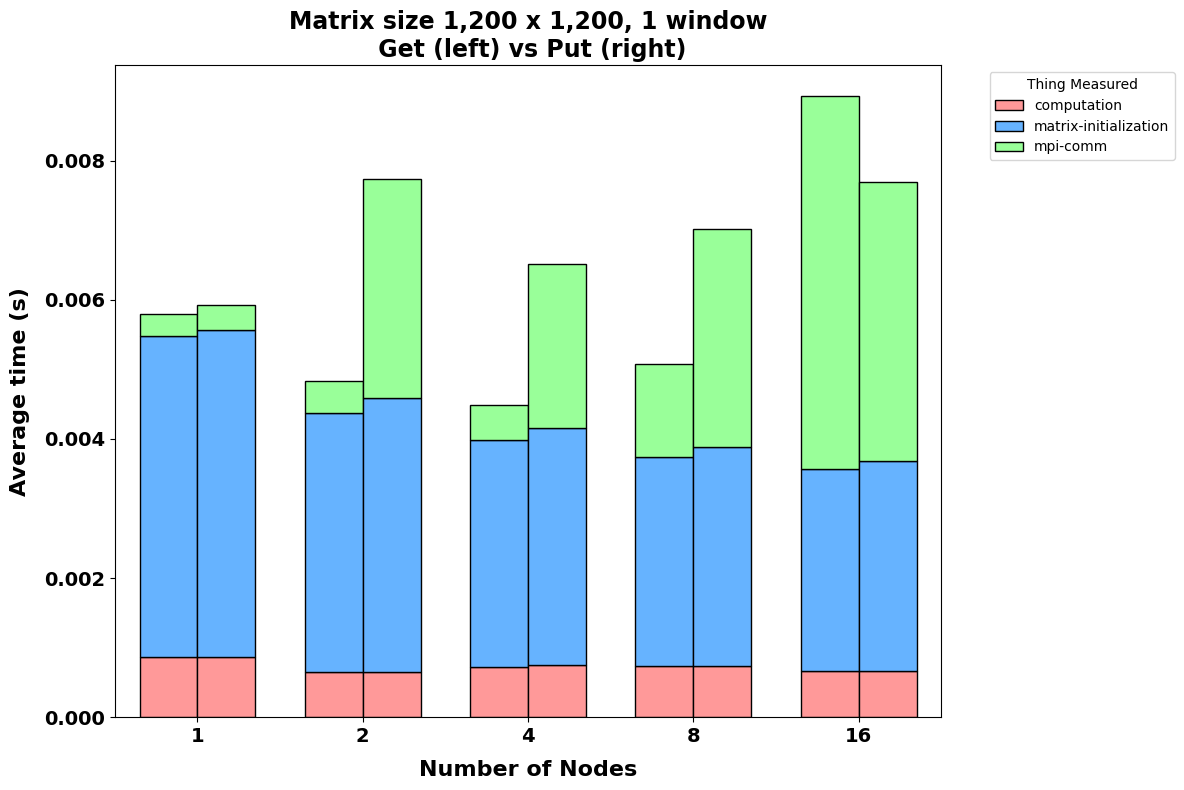

In [5]:
p1_bis = make_get_vs_put_plot(data_1win, title='Matrix size 1,200 x 1,200, 1 window\n Get (left) vs Put (right)', ylog=False)
p1_bis.show()

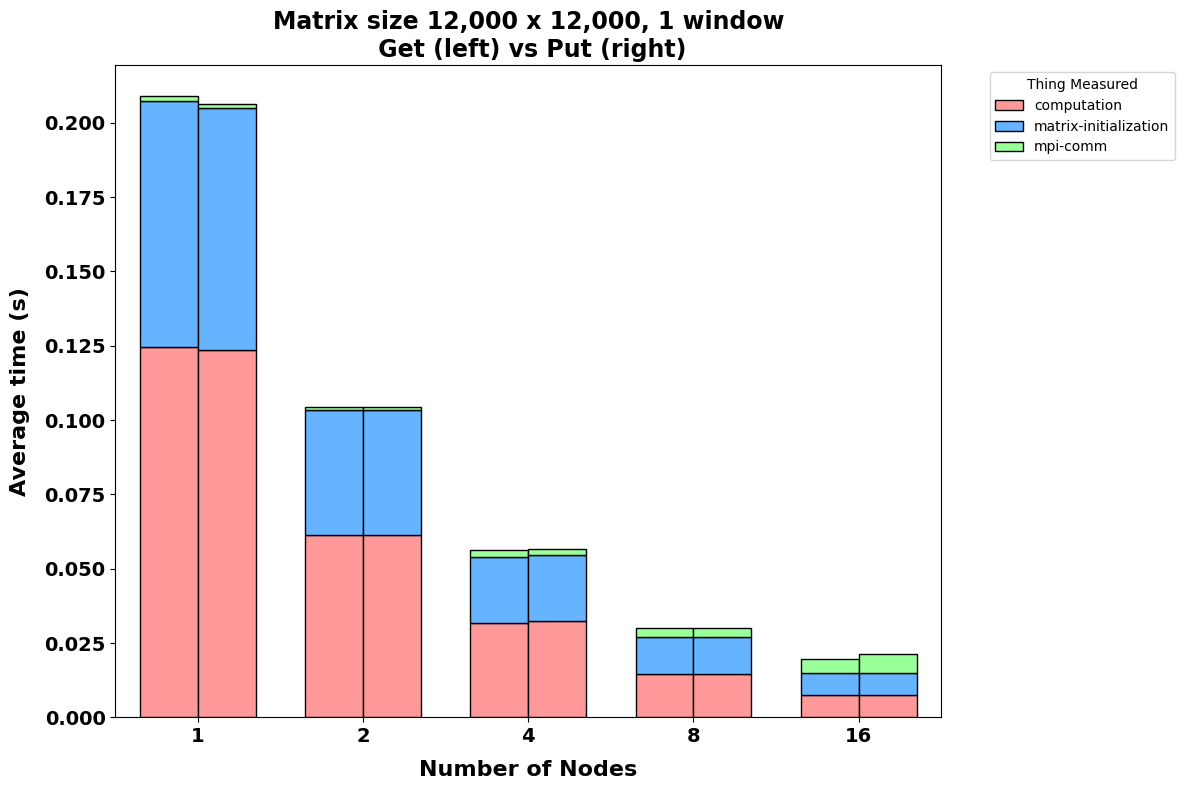

In [6]:
# same as above but for 12k
data_1win_12k = data[data['windows'] == 1]
data_1win_12k = data_1win_12k[data_1win_12k['operation'] != 'none']
data_1win_12k = data_1win_12k[data_1win_12k['size'] == 12000]

p2 = make_get_vs_put_plot(data_1win_12k, title='Matrix size 12,000 x 12,000, 1 window\n Get (left) vs Put (right)', ylog=False)

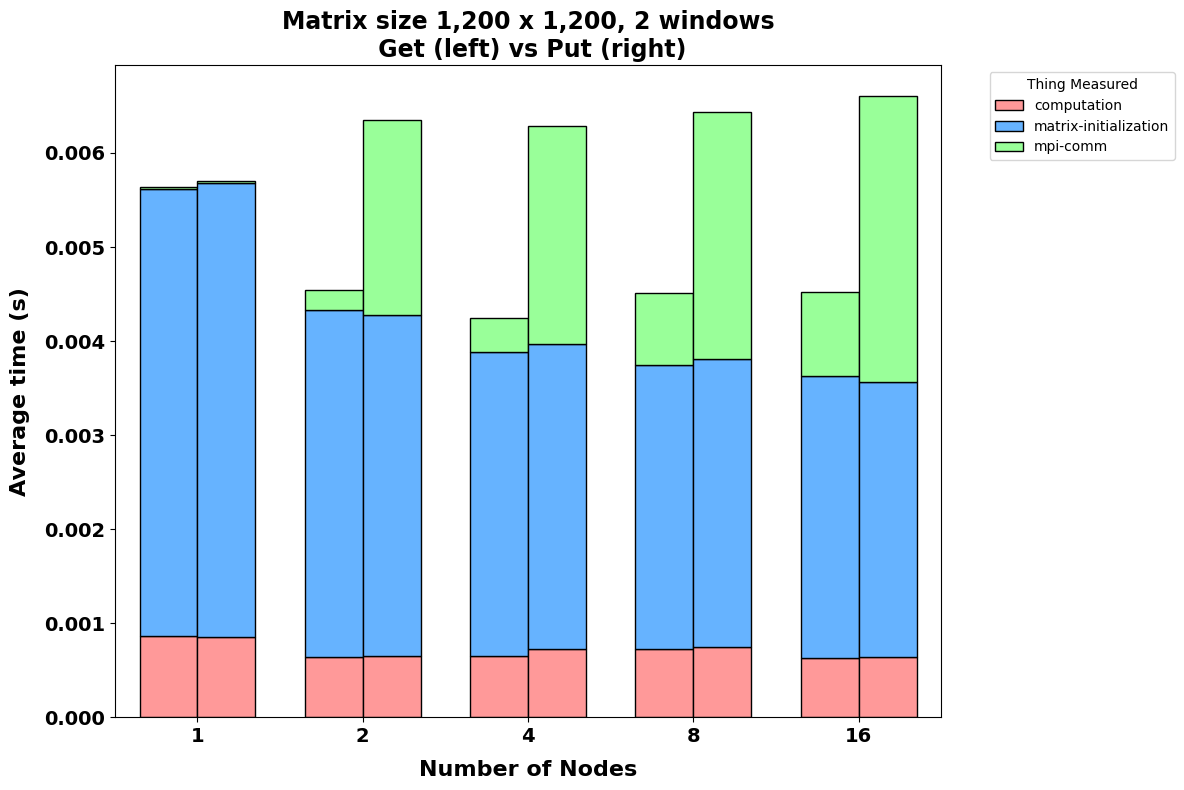

In [7]:
# Now let's do it for the 2 windows
data_2win = data[data['windows'] == 2]
data_2win = data_2win[data_2win['operation'] != 'none']
data_2win = data_2win[data_2win['size'] == 1200]

p3 = make_get_vs_put_plot(data_2win, title='Matrix size 1,200 x 1,200, 2 windows\n Get (left) vs Put (right)', ylog=False)
p3.show()

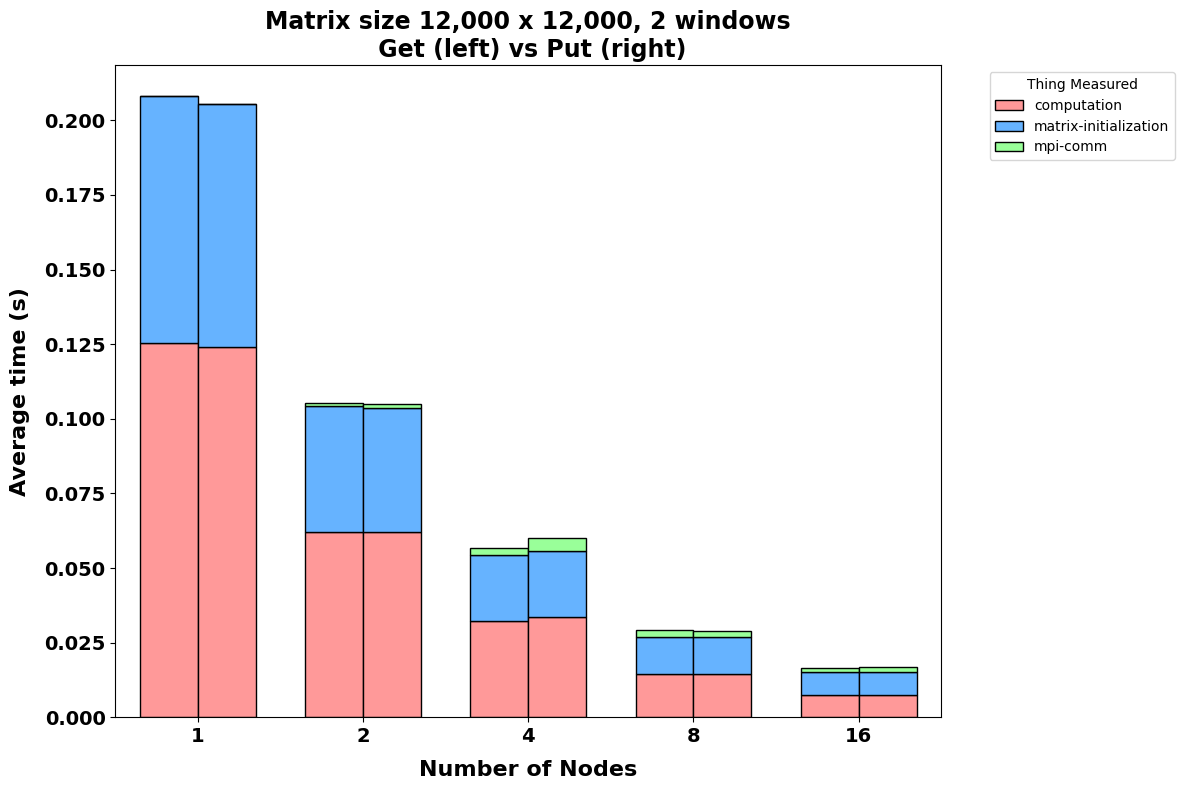

In [8]:
# same as above but for 12k
data_2win_12k = data[data['windows'] == 2]
data_2win_12k = data_2win_12k[data_2win_12k['operation'] != 'none']
data_2win_12k = data_2win_12k[data_2win_12k['size'] == 12000]

p4 = make_get_vs_put_plot(data_2win_12k, title='Matrix size 12,000 x 12,000, 2 windows\n Get (left) vs Put (right)', ylog=False)
p4.show()

 The difference between get and put seems to be not so relevant. 
 Hence, just to keep an example, let's considered in the following the case of `put` operations

In [9]:
X_LIM_3_COL = (-0.75, 4.5)
COL_WIDTH_3 = 0.25

def compare_windows(df_0, df_1, df_2, title="", ylog=False):
    
    pivot_0 = df_0.pivot(index='nodes', columns='what', values='time')
    pivot_1 = df_1.pivot(index='nodes', columns='what', values='time')
    pivot_2 = df_2.pivot(index='nodes', columns='what', values='time')

    # Make 3 stackbar plots
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    pivot_0.plot(kind='bar', stacked=True, ax=ax, width=COL_WIDTH_3, position=0, edgecolor=EDGE_COLOR, color=COLUMN_COLORS)
    pivot_1.plot(kind='bar', stacked=True, ax=ax, width=COL_WIDTH_3, position=1, edgecolor=EDGE_COLOR, color=COLUMN_COLORS)
    pivot_2.plot(kind='bar', stacked=True, ax=ax, width=COL_WIDTH_3, position=2, edgecolor=EDGE_COLOR, color=COLUMN_COLORS)
    
    if ylog:
        plt.yscale('log')

    # Adjust x-axis ticks and labels
    ax.set_xticks(range(len(pivot_0.index)))
    ax.set_xticklabels(pivot_0.index, fontsize=TICKS_FONT_SIZE, fontweight='bold', rotation=0)

    # Adjust y-axis ticks and labels
    ax.tick_params(axis='y', which='major', labelsize=TICKS_FONT_SIZE)
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.xlim(X_LIM_3_COL)
    
    # Labels and title    
    plt.xlabel('Number of Nodes', fontsize=X_LABEL_FONT_SIZE, labelpad=X_LABEL_PAD, fontweight='bold')
    ylab = 'log(Average time (s))' if ylog else 'Average time (s)'
    plt.ylabel(ylab, fontsize=Y_LABEL_FONT_SIZE, labelpad=Y_LABEL_PAD, fontweight='bold')
    plt.title(title, fontsize=TITLE_FONT_SIZE, fontweight='bold')
    
    # Legend: 
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt

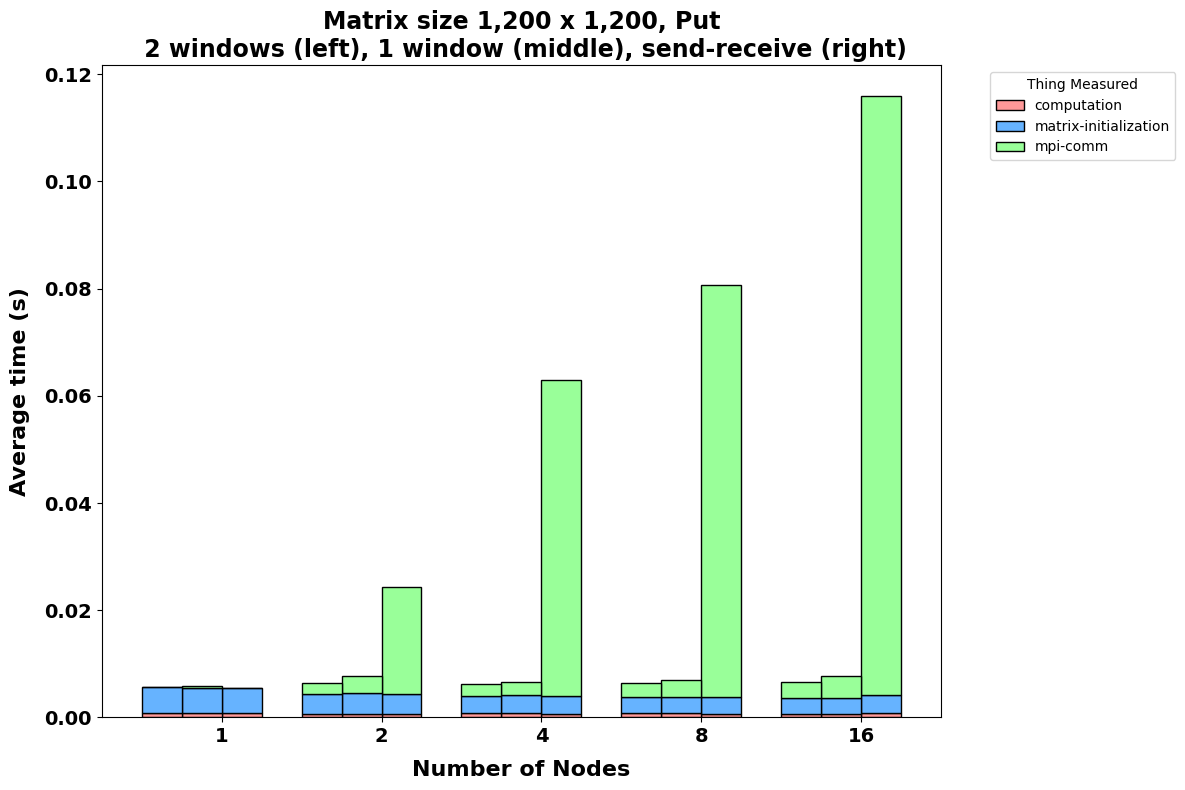

In [10]:
data_put = data[data['operation'] == 'put']
data_put = data_put[data_put['size'] == 1200]
df_1_win = data_put[data_put['windows'] == 1]
df_2_win = data_put[data_put['windows'] == 2]
df_0_win = data[data['windows'] == 0]
df_0_win = df_0_win[df_0_win['size'] == 1200]

p5 = compare_windows(df_0_win, df_1_win, df_2_win, title='Matrix size 1,200 x 1,200, Put\n 2 windows (left), 1 window (middle), send-receive (right)', ylog=False)
p5.show()

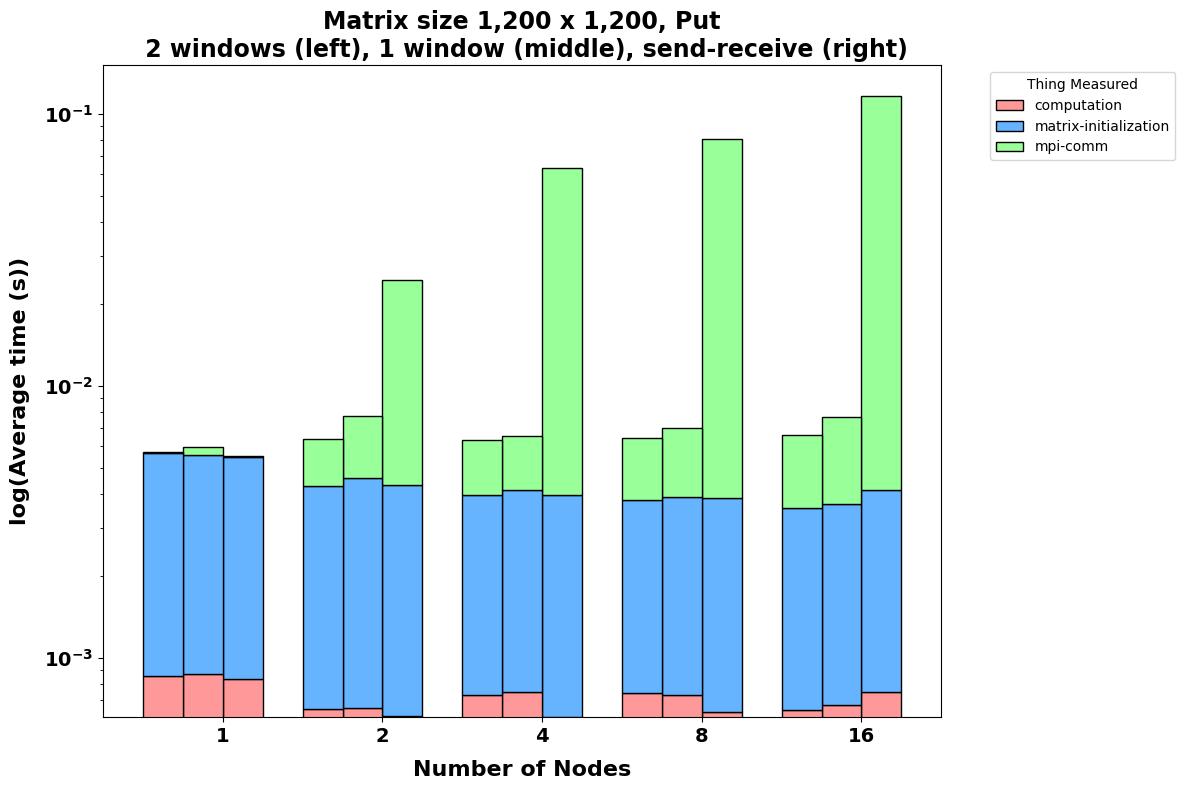

In [11]:
p5_bis = compare_windows(df_0_win, df_1_win, df_2_win, title='Matrix size 1,200 x 1,200, Put\n 2 windows (left), 1 window (middle), send-receive (right)', ylog=True)
p5_bis.show()

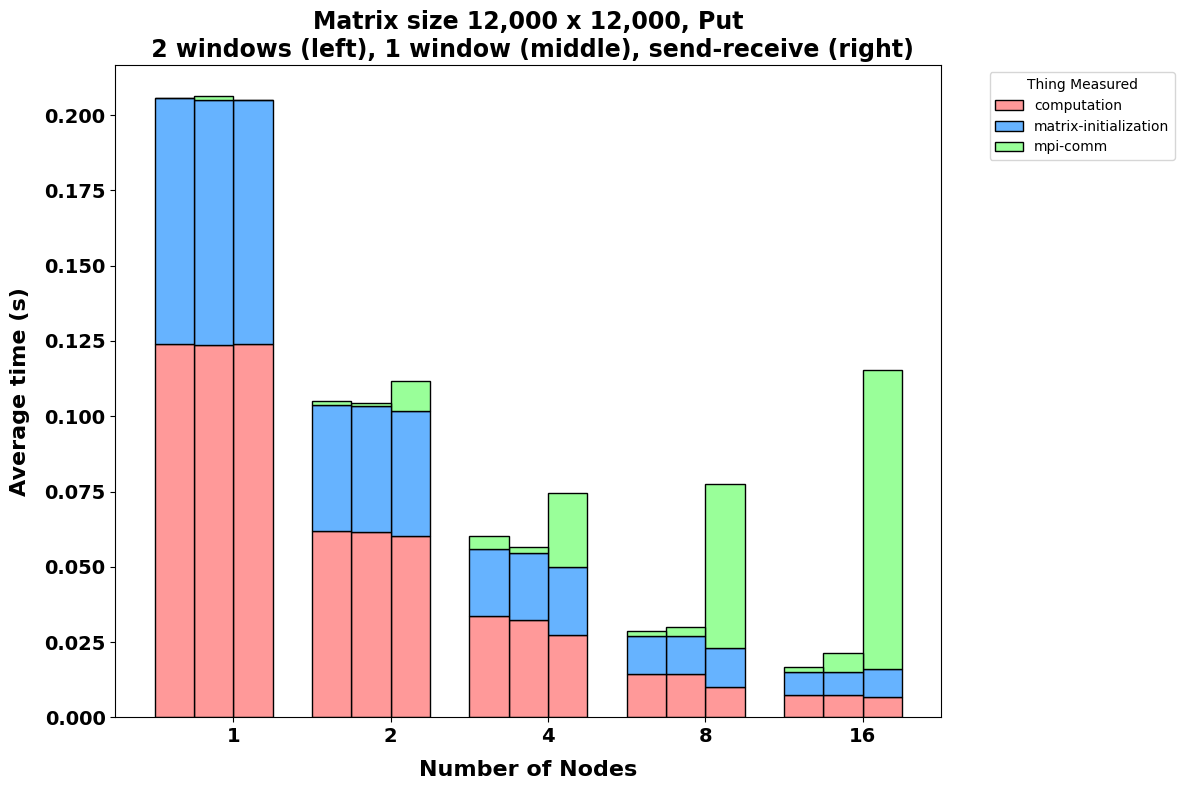

In [12]:
# same as above, but for 12k
data_put = data[data['operation'] == 'put']
data_put_12k = data_put[data_put['size'] == 12000]
df_1_win_12k = data_put_12k[data_put_12k['windows'] == 1]
df_2_win_12k = data_put_12k[data_put_12k['windows'] == 2]
df_0_win_12k = data[data['windows'] == 0]
df_0_win_12k = df_0_win_12k[df_0_win_12k['size'] == 12000]

p6 = compare_windows(df_0_win_12k, df_1_win_12k, df_2_win_12k, title='Matrix size 12,000 x 12,000, Put\n 2 windows (left), 1 window (middle), send-receive (right)',  ylog=False)
p6.show()

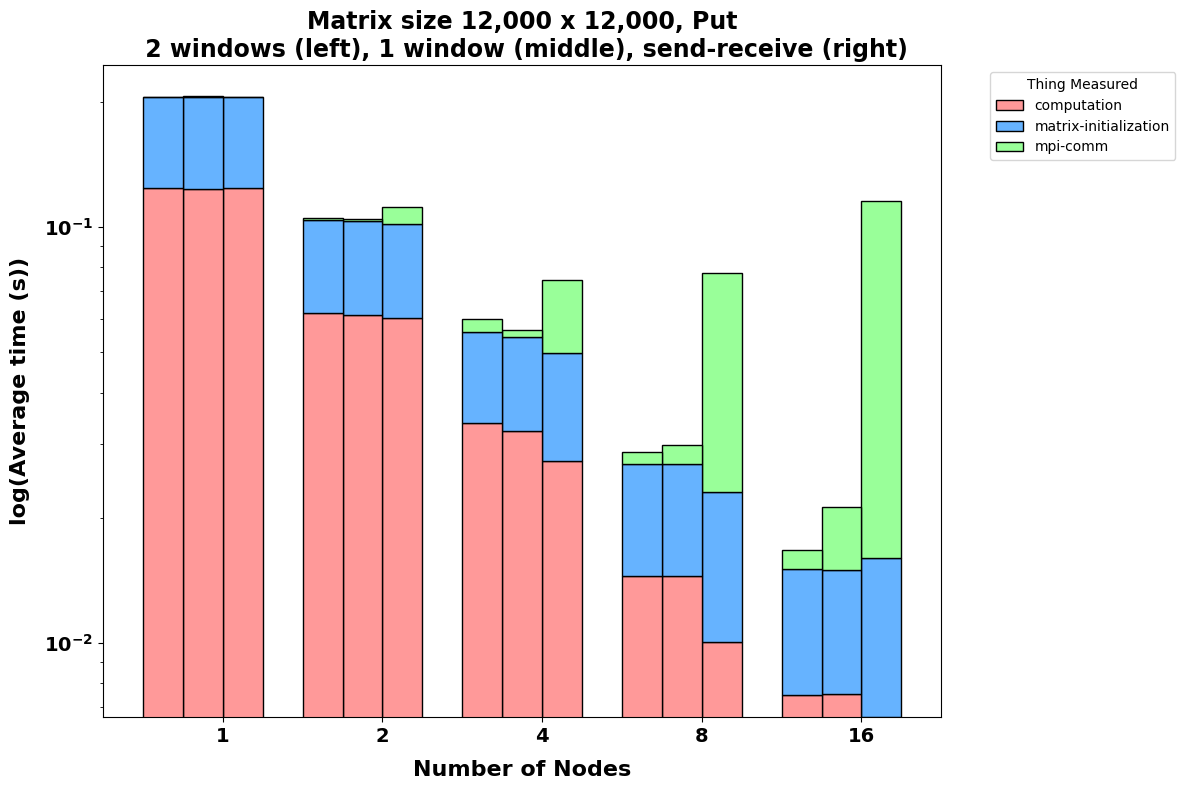

In [13]:
p6_bis = compare_windows(df_0_win_12k, df_1_win_12k, df_2_win_12k, title='Matrix size 12,000 x 12,000, Put\n 2 windows (left), 1 window (middle), send-receive (right)',  ylog=True)
p6_bis.show()